In [1]:
import sys
sys.path.append('..')

In [2]:
import matplotlib.pyplot as plt

In [3]:
from nbhd import data, geometry

In [4]:
db = data.Base()

Initializing database connection...
Database connected!


In [5]:
from shapely.geometry import Point

In [6]:
p = Point(338200, 392100)

In [7]:
roads = db.intersects('roads', p.buffer(100))
buildings = db.intersects('buildings', p.buffer(100))
properties = db.intersects('properties', p.buffer(100))

<AxesSubplot:>

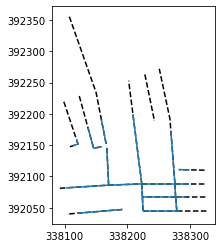

In [8]:
ax = roads.plot(color='k', linestyle='dashed')
roads.geometry.apply(lambda x: geometry.trim(x, p.buffer(100))).plot(ax=ax)

In [9]:
for x in (roads, buildings):
    x.geometry = x.geometry.apply(lambda x: geometry.trim(x, p.buffer(100)))

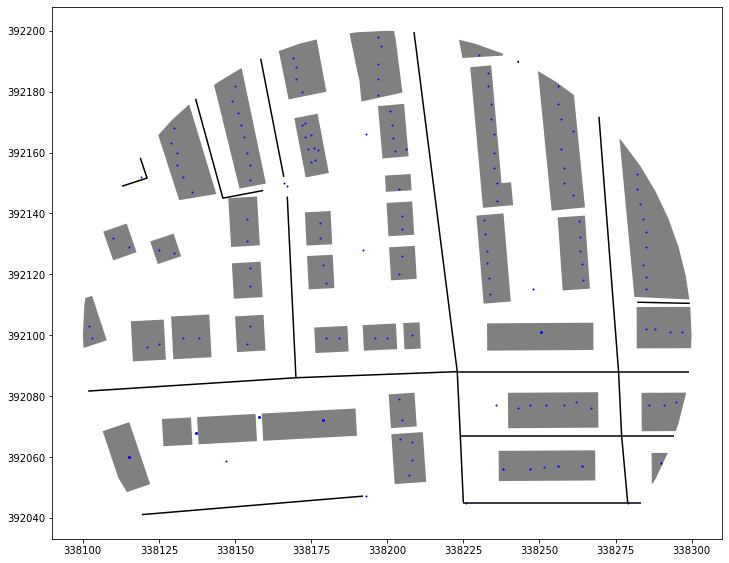

In [10]:
f, ax = plt.subplots(figsize=(12,12))
c = ('k','grey', 'blue')
for i, x in enumerate((roads, buildings, properties)):
    x.plot(ax=ax, color=c[i], markersize=1)